In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import RandomOverSampler

In [2]:
pd.set_option('display.max_columns', None)

# Using exploded data tabel

In [3]:
save_file_name = "Cleaned_Full_100K_wines_exploded"
wine_df_1 = pd.read_csv(f'~/code/ArjanAngenent/VinoDine/raw_data/{save_file_name}.csv')
wine_df_1

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
0,100003,Cabernet Sauvignon,Red,Varietal/100%,CabernetSauvignon,Beef,12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
1,100003,Cabernet Sauvignon,Red,Varietal/100%,CabernetSauvignon,Lamb,12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
2,100003,Cabernet Sauvignon,Red,Varietal/100%,CabernetSauvignon,Poultry,12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
3,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,CabernetSauvignon,Beef,11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
4,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,Merlot,Beef,11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527951,200795,Rotleiten,Red,Assemblage/Blend,CabernetSauvignon,SpicyFood,13.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2017, 2015, 2014, 2013, 2012, 201..."
527952,200795,Rotleiten,Red,Assemblage/Blend,CabernetSauvignon,MaturatedCheese,13.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2017, 2015, 2014, 2013, 2012, 201..."
527953,200795,Rotleiten,Red,Assemblage/Blend,CabernetSauvignon,HardCheese,13.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2017, 2015, 2014, 2013, 2012, 201..."
527954,200795,Rotleiten,Red,Assemblage/Blend,CabernetSauvignon,Poultry,13.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2017, 2015, 2014, 2013, 2012, 201..."


In [4]:
wine_df_1['Harmonize'].nunique()

23

In [5]:
wine_df_1['Grapes'].nunique()

50

In [6]:
wine_df_1['Acidity'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

## create base model

In [7]:
# features to select: Type, Elaborate, Grapes, ABV, Body, Acidity
# target: harmonize
y = wine_df_1[['Harmonize']]
X = wine_df_1[['Type', 'Elaborate', 'ABV', 'Body', 'Grapes', 'Acidity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe_y = OneHotEncoder(sparse_output=False)

# Create Ordinal Enoder for Acidity with 3 categories ['High', 'Medium', 'Low']
ordinal_encoder = OrdinalEncoder(categories=[['High', 'Medium', 'Low']])

# Create StandardScaler for ABV(numerical feeature)
standard_scaler = StandardScaler()

# fit_transform encoders and scalers to X_train
X_train[ohe.get_feature_names_out()] = ohe.fit_transform(X_train[['Type','Elaborate','Body', 'Grapes']])

X_train['encoded_acidicity'] = ordinal_encoder.fit_transform(X_train[['Acidity']])

X_train['ABV'] = standard_scaler.fit_transform(X_train[['ABV']])

X_train.drop(columns=['Type','Elaborate','Body', 'Acidity', 'Grapes'], inplace=True)

#y_train = ohe_y.fit_transform(y_train)

# transform X_test with encoders and scalers
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[['Type','Elaborate','Body', 'Grapes']])

X_test['encoded_acidicity'] = ordinal_encoder.transform(X_test[['Acidity']])

X_test['ABV'] = standard_scaler.transform(X_test[['ABV']])

X_test.drop(columns=['Type','Elaborate','Body', 'Acidity', 'Grapes'], inplace=True)

#y_test = ohe_y.transform(y_test)

In [8]:
X_train.head()

,ABV,Type_Dessert,Type_Dessert/Port,Type_Red,Type_Rosé,Type_Sparkling,Type_White,Elaborate_Assemblage/Blend,Elaborate_Assemblage/Bordeaux Red Blend,Elaborate_Assemblage/Bourgogne Red Blend,Elaborate_Assemblage/Bourgogne White Blend,Elaborate_Assemblage/Cava Blend,Elaborate_Assemblage/Champagne Blend,Elaborate_Assemblage/Chianti Red Blend,Elaborate_Assemblage/Meritage Red Blend,Elaborate_Assemblage/Meritage White Blend,Elaborate_Assemblage/Port Blend,Elaborate_Assemblage/Portuguese Red Blend,Elaborate_Assemblage/Portuguese White Blend,Elaborate_Assemblage/Priorat Red Blend,Elaborate_Assemblage/Provence Rosé Blend,Elaborate_Assemblage/Rhône Red Blend,Elaborate_Assemblage/Rioja Red Blend,Elaborate_Assemblage/Soave White Blend,Elaborate_Assemblage/Tuscan Red Blend,Elaborate_Assemblage/Valpolicella Red Blend,Elaborate_Varietal/100%,Elaborate_Varietal/>75%,Body_Full-bodied,Body_Light-bodied,Body_Medium-bodied,Body_Very full-bodied,Body_Very light-bodied,Grapes_AlicanteBouschet,Grapes_Aragonez,Grapes_Barbera,Grapes_CabernetFranc,Grapes_CabernetSauvignon,Grapes_Carignan/Cariñena,Grapes_Carmenère,Grapes_Chardonnay,Grapes_CheninBlanc,Grapes_Cinsault,Grapes_Cortese,Grapes_Corvina,Grapes_GamayNoir,Grapes_Garganega,Grapes_Garnacha,Grapes_Gewürztraminer,Grapes_Glera/Prosecco,Grapes_Grenache,Grapes_GrenacheBlanc,Grapes_GrünerVeltliner,Grapes_Macabeo,Grapes_Malbec,Grapes_Merlot,Grapes_Molinara,Grapes_Montepulciano,Grapes_Mourvedre,Grapes_Nebbiolo,Grapes_PetitVerdot,Grapes_PetiteSirah,Grapes_PinotBlanc,Grapes_PinotGrigio,Grapes_PinotGris,Grapes_PinotMeunier,Grapes_PinotNoir,Grapes_Primitivo,Grapes_Riesling,Grapes_Rondinella,Grapes_Roussanne,Grapes_Sangiovese,Grapes_SauvignonBlanc,Grapes_Spätburgunder,Grapes_Syrah/Shiraz,Grapes_Sémillon,Grapes_Tempranillo,Grapes_TintaRoriz,Grapes_TourigaFranca,Grapes_TourigaNacional,Grapes_Trebbiano,Grapes_Viognier,Grapes_Zinfandel,encoded_acidicity
93128,-0.631335,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421330,0.089598,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214775,0.089598,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211639,0.089598,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90833,0.450065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
y_train.shape

(369569, 1)

In [10]:
model = LogisticRegression()
# Make it an Multilabel classifier
#multilabel_classifier = MultiOutputClassifier(model, n_jobs=-1)

# Fit the data to the Multilabel classifier
#multilabel_classifier = multilabel_classifier.fit(X_train, y_train)
model.fit(X_train, y_train)

/Users/tobiaseckers/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tobiaseckers/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
model = LogisticRegression(max_iter=1000)
OVR = OneVsRestClassifier(model)
OVR.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [12]:
# cross_val_score(estimator=multilabel_classifier,X=X_train,y=y_train, cv=5, n_jobs=-1)

In [13]:
y_pred = OVR.predict(X_test)
y_pred

array(['Shellfish', 'RichFish', 'Beef', ..., 'Shellfish', 'Beef', 'Veal'],
      dtype='<U15')

In [14]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.21675390025696553


In [15]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

      Appetizer       0.20      0.08      0.11      2061
           Beef       0.24      0.62      0.35     24579
     BlueCheese       0.27      0.19      0.22       485
      CuredMeat       0.14      0.06      0.08      4185
   FruitDessert       0.14      0.04      0.06       342
       GameMeat       0.22      0.06      0.10     15519
     GoatCheese       0.29      0.26      0.27       793
     HardCheese       0.16      0.02      0.04      3984
           Lamb       0.23      0.18      0.20     16685
       LeanFish       0.18      0.15      0.16      2186
MaturatedCheese       0.15      0.03      0.04      4018
      Mushrooms       0.24      0.13      0.17       438
          Pasta       0.14      0.04      0.06      7397
           Pork       0.17      0.15      0.16      9284
        Poultry       0.20      0.16      0.18     23768
       RichFish       0.20      0.49      0.28      6829
      Shellfish       0.19    

# Using non-exploded data table

In [16]:
save_file_name = "Cleaned_Full_100K_wines"
mlb_harm = MultiLabelBinarizer(sparse_output=False)
mlb_grape = MultiLabelBinarizer(sparse_output=False)

wine_df_2 = pd.read_csv(f'~/code/ArjanAngenent/VinoDine/raw_data/{save_file_name}.csv')

In [17]:
mlb_harm = MultiLabelBinarizer(sparse_output=False)
mlb_grape = MultiLabelBinarizer(sparse_output=False)

y_2 = wine_df_2[['Harmonize']]
X_2 = wine_df_2[['Type', 'Elaborate', 'Grapes', 'ABV', 'Body', 'Acidity']]

In [18]:
y_2_bin = mlb_harm.fit_transform(eval(element) for element in y_2.Harmonize)
y_2_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
X_2_bin = X_2.join(pd.DataFrame(
    mlb_grape.fit_transform(eval(element) for element in X_2.Grapes),
    index=X_2.index,
    columns=mlb_grape.classes_
    ))
X_2_bin.drop(columns='Grapes', inplace=True)
X_2_bin


,Type,Elaborate,ABV,Body,Acidity,"""BiancodAlessano""","""LAcadieBlanc""","""LendelEl""","""LoindelOeil""","""NerodAvola""","""PineauDAunis""","""RoussetteDAyze""","""TrebbianodAbruzzo""",Abbuoto,Abouriou,Abrostine,Acolon,Agiorgitiko,Aglianico,Aidani,Airen,Albalonga,Albana,Albanella,Albariño,Albarola,Albarossa,AlbarínBlanco,Albillo,AlbilloCrimean,AlbilloMayor,AlbillodeAlbacete,Aleatico,AlfrocheiroPreto,Alibernet,AlicanteBouschet,AlicanteGanzin,Aligoté,Altesse,Alvarelhão,Alvarinho,Amigne,Ancellotta,Ansonica,AntãoVaz,Aragonez,Aramon,Arbane,Areni,Argaman,Arinarnoa,Arinto,ArintodeBucelas,ArintodosAçores,Arneis,Arnsburger,Arriloba,AspiranBouschet,AsprinioBianco,AssarioBranco,Assyrtiko,Athiri,Aurore,Avanà,Avesso,Avgoustiatis,AzalBranco,AzalTinto,Babić,Bacchus,BacoNoir,Baga,Barbarossa,Barbera,Barcelo,Barsaglina,BastardoMagarachsky,Batoca,Bellone,Bianca,Biancame,BianchettaTrevigiana,Biancolella,Bical,BlackQueen,Blauburger,Blauburgunder,BlauerPortugieser,Blaufränkisch,BoalBranco,Bobal,Bogazkere,BombinoBianco,BombinoNero,Bonamico,Bonarda,Bordô,Borraçal,Bosco,Bourboulenc,Bovale,Brachetto,Braquet,Braucol,Brianna,Bronner,BrunArgenté,Bruñal,Bual,BudaiZöld,Bukettraube,BurgundMare,BusuioacadeBohotin,BăbeascăNeagră,CabernetBlanc,CabernetCortis,CabernetCubin,CabernetDorsa,CabernetFranc,CabernetJura,CabernetMitos,CabernetRuby,CabernetSauvignon,CabernetSeverny,Cagnulari,CaiñoBlanco,CaiñoTinto,CalabresediMontenuovo,Caladoc,Calkarasi,Callet,Camarate,CanaioloBlanco,CanaioloNero,Cannonau,Carignan/Cariñena,Carmenère,Carricante,Casavecchia,Cascade,Casetta,Castelão,CatarrattoBianco,Catawba,CayugaWhite,Cencibel,Centesiminio,CercealBranco,Cesanese,Chambourcin,Chancellor,Charbono,Chardonel,Chardonnay,ChardonnayMusqué,Chasan,Chasselas,Chatus,Chenanson,CheninBlanc,Chinuri,Cienna,Ciliegiolo,Cinsault,Clairette,Cococciola,CodadiVolpeBianca,Colobel,Colombard,Coloraillo,ColorinodelValdarno,Concord,CorintoNero,Cornalin,Cornifesto,CorotNoir,Cortese,Corvina,Corvinone,Couderc,Counoise,CriollaGrande,Croatina,Crouchen,Cynthiana,CôdegadeLarinho,Côt,Dafni,Dakapo,DeChaunac,Debina,Diagalves,Dimiat,Dimrit,Dindarella,Diolinoir,Dolcetto,Domina,DonaBlanca,DonzelinhoBranco,DonzelinhoTinto,Dornfelder,Drupeggio,Dunkelfelder,Duras,Durella,Durif,DzvelshaviObchuri,Edelweiss,Egiodola,Ehrenfelser,EmeraldRiesling,Emir,Enantio,Encruzado,Erbaluce,Espadeiro,Falanghina,FalanghinaBeneventana,Famoso,Favorita,Fenile,FerServadou,FernãoPires,FeteascaAlba,FeteascaNeagra,FeteascaRegala,Fiano,Flora,FogliaTonda,Fokiano,Folgasao,FolleBlanche,FonteCal,Fragolino,Francusa,Frappato,Fredonia,Freisa,Friulano/Sauvignonasse,Frontenac,FruhroterVeltliner,Frühburgunder,Fumin,FuméBlanc,Furmint,Gaglioppo,Gaidouria,Galotta,Gamaret,GamayNoir,GamayTeinturierdeBouze,GambadiPernice,Garanoir,Garganega,Garnacha,GarnachaBlanca,GarnachaPeluda,GarnachaRoja,GarnachaTinta,GarnachaTintorera,GarridoFino,GelberMuskateller,Gewürztraminer,Gigiac,Ginestra,Girgentina,GiròBlanc,Glera/Prosecco,Godello,GoldTraminer,Goldburger,Golubok,Gorgollasa,GoruliMtsvane,Gouveio,GouveioReal,Graciano,GrandNoir,GrasadeCotnari,Grauburgunder,Grecanico,Grechetto,GrechettoRosso,Greco,GrecoBianco,GrecoNero,Grenache,GrenacheBlanc,GrenacheGris,Grignolino,Grillo,Gringet,Grolleau,Groppello,GrosManseng,GrosVerdot,GrünerVeltliner,Guardavalle,Gutedel,Hanepoot,Helios,Hibernal,HondarrabiBeltza,HondarrabiZuri,HumagneBlanche,HumagneRouge,Huxelrebe,Hárslevelű,IncrocioManzoni,Inzolia,IrsaiOliver,Isabella,Jacquère,Jaen,Jampal,Johannisberg,Johanniter,JuanGarcia,Kabar,Kadarka,Kakhet,Kakotrygis,KalecikKarasi,Kangun,Karasakiz,Karmahyut,Katsano,Keratsuda,Kerner,Khikhvi,Királyleányka,Kisi,Klevner,KokurBely,Koshu,Kotsifali,KrasnostopAnapsky,KrasnostopZolotovsky,Kratosija,Krstac,Kydonitsa,Kékfrankos,Lacrima,Lafnetscha,Lagrein,Lambrusco,Lampia,LandotNoir,Lauzet,Leanyka,Lefkada,Lemberger,Lenoir,LeonMillot,Liatiko,Limnio,Limniona,ListanNegro,Lorena,Loureiro,Macabeo,MadeleineAngevine,MaglioccoCanino,Malagouzia,Malbec,MalboGentile,Malvar,Malvasia,MalvasiaBiancaLunga,MalvasiaFina,

In [20]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2_bin, y_2_bin, random_state=42, test_size=0.3)

In [21]:
X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape 

((70452, 782), (30194, 782), (70452, 66), (30194, 66))

## Model definition

In [22]:
# Define which columns need to be encoded
cat_cols = ['Type','Elaborate','Body','Acidity']
num_cols = ['ABV']
cat_pre = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
                        MinMaxScaler())
cat_num = make_pipeline(MinMaxScaler())

# Create preprocessor pipeline
preprocessing = make_column_transformer((cat_pre, cat_cols),(cat_num, num_cols))

# Create binary classifier
binary_classifier = SGDClassifier(max_iter=500, random_state=42)

ova_classifier = OneVsRestClassifier(binary_classifier)

pipeline = make_pipeline(preprocessing, ova_classifier)

In [23]:
pipeline.fit(X_train_2, y_train_2)

/Users/tobiaseckers/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 19 is present in all training examples.
  warnings.warn(
/Users/tobiaseckers/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 65 is present in all training examples.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Type', 'Elaborate', 'Body',
                                                   'Acidity']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['ABV'])])),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=SGDClassifier(max_iter=500,
                                                             random_state=42)))])

In [24]:
y_pred_2 = ova_classifier.predict(preprocessing.transform(X_test_2))

In [25]:
# Evaluate performance
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
print("Accuracy:", accuracy_2)

Accuracy: 0.19358150625952175


In [26]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test_2, y_pred_2))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.99      0.17      0.29      2776
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        44
           5       0.00      0.00      0.00         0
           6       0.92      0.98      0.95     17457
           7       0.00      0.00      0.00       381
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        37
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        21
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         3
    

/Users/tobiaseckers/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiaseckers/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiaseckers/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control 

# Reducing features and targets

In [102]:
save_file_name = "Cleaned_Full_100K_wines"
mlb_harm = MultiLabelBinarizer(sparse_output=False)
mlb_grape = MultiLabelBinarizer(sparse_output=False)

wine_df_2 = pd.read_csv(f'~/code/ArjanAngenent/VinoDine/raw_data/{save_file_name}.csv')


# Binary encode grapes
wine_df_2_bin = wine_df_2.join(pd.DataFrame(
    mlb_grape.fit_transform(eval(element) for element in wine_df_2.Grapes),
    index=wine_df_2.index,
    columns=mlb_grape.classes_
    ))
wine_df_2_bin.drop(columns=['Grapes'], inplace=True)

# Create a list of the kind of grapes that are mentioned less then 2.000 times
grapes_list = wine_df_2_bin.iloc[:,16:].sum() # sum the number of times a grape is mentioned via column
grapes_to_drop = grapes_list[grapes_list<2_000].index.to_list() # create a list withe kind of grapes mentioned less then 2.000 times

wine_df_2_bin.drop(columns=grapes_to_drop, inplace=True) # drop columns with grapes not mentioned more then 2.000 times
wine_df_2_bin = wine_df_2_bin[wine_df_2_bin.iloc[:,16:].eq(1).any(axis=1)] # drop wines which are not represented by a grape anymore

# Binary encode Harmonize(kinds of food)
wine_df_2_bin = wine_df_2_bin.join(pd.DataFrame(
    mlb_harm.fit_transform(eval(element) for element in wine_df_2.Harmonize),
    index=wine_df_2.index,
    columns=mlb_harm.classes_
    ))
wine_df_2_bin.drop(columns=['Harmonize'], inplace=True)

# Create a list of the kind of grapes that are mentioned less then 2.000 times
harm_list = wine_df_2_bin.iloc[:,29:].sum() # sum the number of times a food is mentioned via column
harm_to_drop = harm_list[harm_list<=5_000].index.to_list() # create a list withe kind of food mentioned less then 50 times
wine_df_2_bin.drop(columns=harm_to_drop, inplace=True) # drop columns with food not mentioned more then 50 times
wine_df_2_bin = wine_df_2_bin[wine_df_2_bin.iloc[:,29:].eq(1).any(axis=1)] # drop wines which are not represented by a food anymore

#Drop addional columns not used for model
wine_df_2_bin_cleaned = wine_df_2_bin.drop(columns=['WineName', 'WineID','Code','Country','RegionID','RegionName','WineryID','Website','Vintages', 'WineryName'])

In [103]:
wine_df_2_bin_cleaned

,Type,Elaborate,ABV,Body,Acidity,CabernetFranc,CabernetSauvignon,Chardonnay,Grenache,Malbec,Merlot,PinotNoir,Riesling,Sangiovese,SauvignonBlanc,Syrah/Shiraz,Tempranillo,TourigaNacional,Aperitif,Beef,CuredMeat,GameMeat,HardCheese,Lamb,MaturatedCheese,Pasta,Pork,Poultry,RichFish,Shellfish,SoftCheese,SpicyFood,Veal,Vegetarian
2,Red,Varietal/100%,12.0,Full-bodied,High,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,Red,Assemblage/Bordeaux Red Blend,11.0,Full-bodied,Medium,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0
5,Red,Varietal/100%,12.5,Full-bodied,High,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
7,Red,Varietal/100%,13.5,Full-bodied,High,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
8,Red,Assemblage/Bordeaux Red Blend,12.5,Full-bodied,High,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100638,Red,Assemblage/Bordeaux Red Blend,14.5,Full-bodied,High,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
100639,Red,Varietal/100%,12.0,Medium-bodied,Medium,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
100642,Dessert,Varietal/100%,13.5,Medium-bodied,High,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
100644,White,Varietal/100%,12.5,Medium-bodied,High,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0


In [104]:
# Define which columns need to be encoded
cat_cols = ['Type','Elaborate','Body','Acidity']
# cat_cols = ['Type', 'Acidity','Elaborate']
num_cols = ['ABV']
cat_pre = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
                        MinMaxScaler())
cat_num = make_pipeline(MinMaxScaler())

# Create preprocessor pipeline
preprocessing = make_column_transformer((cat_pre, cat_cols),(cat_num, num_cols))

# Create binary classifier
binary_classifier = SGDClassifier(max_iter=500, random_state=42)

ova_classifier = OneVsRestClassifier(binary_classifier)

pipeline = make_pipeline(preprocessing, ova_classifier)

In [105]:
#X_3 = wine_df_2_bin_cleaned[['Type','Elaborate','Body','Acidity', 'ABV']]
X_3 = wine_df_2_bin_cleaned.iloc[:,:5]
y_3 = wine_df_2_bin_cleaned.iloc[:,19:]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=42, test_size=0.3)

X_train_3.shape, X_test_3.shape, y_train_3.shape, y_test_3.shape 

((46501, 5), (19930, 5), (46501, 15), (19930, 15))

In [203]:
pipeline.fit(X_train_3, y_train_3)

y_pred_3 = ova_classifier.predict(preprocessing.transform(X_test_3))

# Evaluate performance
accuracy_3 = accuracy_score(y_test_3, y_pred_3)
print("Accuracy:", accuracy_3)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred_3))

Accuracy: 0.22142498745609634

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     13176
           1       0.67      0.57      0.62      2438
           2       0.70      0.66      0.68      8316
           3       0.87      0.10      0.18      1816
           4       0.82      0.94      0.88      8438
           5       0.87      0.10      0.18      1825
           6       0.81      0.05      0.09      3116
           7       0.64      0.79      0.71      5192
           8       0.79      0.83      0.81     13572
           9       0.86      0.78      0.82      4158
          10       0.77      0.70      0.74      4223
          11       0.91      0.10      0.18      1987
          12       0.60      0.04      0.08      2698
          13       0.78      0.53      0.63      6079
          14       0.65      0.76      0.70      3390

   micro avg       0.80      0.70      0.74     80424
   macro avg       0.78   

In [32]:
y_3.columns

Index(['Beef', 'GameMeat', 'Lamb', 'Pasta', 'Pork', 'Poultry', 'RichFish',
       'Shellfish', 'Veal', 'Vegetarian'],
      dtype='object')

# Aggregating Harmonization

In [33]:
def combine_harmonize_classes(harmonize):
    if harmonize in ['Beef', 'Lamb', 'Veal', 'GameMeat', 'Pork']:
        return 'Meat'
    elif harmonize in ['Poultry', 'Duck', 'Chicken', 'Turkey']:
        return 'Poultry'
    elif harmonize in ['Shellfish']:
        return 'Shellfish'
    elif harmonize in ['Pasta']:
        return 'Pasta'
    elif harmonize in ['RichFish']:
        return 'RichFish'
    elif harmonize in ['Vegetarian','Mushrooms']:
        return 'Vegetarian'
    elif harmonize in ['Cheese', 'SoftCheese', 'MaturatedCheese', 'HardCheese', 'GoatCheese', 'BlueCheese']:
        return 'Cheese'
    elif harmonize in ['CuredMeat']:
        return 'CuredMeat'
    elif harmonize in ['SpicyFood']:
        return 'SpicyFood'
    elif harmonize in ['Appetizer', 'Snack']:
        return 'Appetizer and Snacks'
    elif harmonize in ['SweetDessert', 'FruitDessert', 'Dessert']:
        return 'Desserts'
    else:
        return harmonize

In [72]:
def combine_type_classes(wine_type):
    if wine_type in ['Dessert','Dessert/Port']:
        return 'Dessert'
    else:
        return wine_type

In [73]:
save_file_name = "Cleaned_Full_100K_wines_exploded"
wine_df_5 = pd.read_csv(f'~/code/ArjanAngenent/VinoDine/raw_data/{save_file_name}.csv')
wine_df_5.drop(columns=['Grapes'], inplace=True)
wine_df_5.Harmonize = wine_df_5.Harmonize.apply(lambda harmonize:combine_harmonize_classes(harmonize))
wine_df_5.Type = wine_df_5.Type.apply(lambda wine_type:combine_type_classes(wine_type))
wine_df_5.drop_duplicates(inplace=True)
wine_df_5

,WineID,WineName,Type,Elaborate,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
0,100003,Cabernet Sauvignon,Red,Varietal/100%,Meat,12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
2,100003,Cabernet Sauvignon,Red,Varietal/100%,Poultry,12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
3,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,Meat,11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
9,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,Poultry,11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
11,100006,Reserva Cabernet Sauvignon,Red,Varietal/100%,Meat,12.5,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527947,200794,Reisberg Riesling,White,Varietal/100%,CuredMeat,12.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
527948,200795,Rotleiten,Red,Assemblage/Blend,Meat,13.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2017, 2015, 2014, 2013, 2012, 201..."
527951,200795,Rotleiten,Red,Assemblage/Blend,SpicyFood,13.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2017, 2015, 2014, 2013, 2012, 201..."
527952,200795,Rotleiten,Red,Assemblage/Blend,Cheese,13.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2017, 2015, 2014, 2013, 2012, 201..."


In [74]:
wine_df_5_no_harm = wine_df_5.drop(columns='Harmonize').drop_duplicates()
wine_df_5_no_harm

,WineID,WineName,Type,Elaborate,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
0,100003,Cabernet Sauvignon,Red,Varietal/100%,12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
3,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
11,100006,Reserva Cabernet Sauvignon,Red,Varietal/100%,12.5,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
14,100008,Paradoxo Cabernet Sauvignon,Red,Varietal/100%,13.5,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10011,Salton,http://www.salton.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
17,100009,Seleção Cabernet Sauvignon-Merlot,Red,Assemblage/Bordeaux Red Blend,12.5,Full-bodied,High,BR,Brazil,1004,Campanha Gaúcha,10013,Miolo,http://www.miolo.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527935,200789,King's Wine Merlot,Red,Varietal/100%,12.0,Medium-bodied,Medium,BG,Bulgaria,2188,Plovdiv,65578,Villa Vinifera,http://www.villavinifera.com,"[2015, 2014, 2013, 2012, 2011, 2010, 2008, 200..."
527937,200791,Rulandské Šedé Výběr z Hroznů,White,Varietal/100%,13.0,Medium-bodied,Medium,CZ,Czech Republic,2295,Morava,67056,Rodinné Vinařství Pavel Binder,http://www.pavelbinder.cz,"[2019, 2018, 2017, 2016, 2015, 2014, 2013, 201..."
527941,200792,Top Collection Merlot Pozdní Sběr,Dessert,Varietal/100%,13.5,Medium-bodied,High,CZ,Czech Republic,2295,Morava,66978,Vinarstvi Mutěnice,http://www.vinarstvimutenice.cz,"[2020, 2019, 2018, 2017, 2016, 2015, 2013, 2010]"
527943,200794,Reisberg Riesling,White,Varietal/100%,12.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."


In [75]:
wine_df_5_grouped = pd.DataFrame(wine_df_5.groupby(by='WineID')['Harmonize'].apply(list))
wine_df_5_merged = wine_df_5_grouped.join(wine_df_5.drop(columns='Harmonize')\
                                          .drop_duplicates().set_index('WineID'), on='WineID', how='left')

In [76]:
# Binary encode Harmonize(kinds of food)
wine_df_5_grouped_bin = wine_df_5_merged.join(pd.DataFrame(
    mlb_harm.fit_transform(element for element in wine_df_5_grouped.Harmonize),
    index=wine_df_5_grouped.index,
    columns=mlb_harm.classes_
    ))
wine_df_5_grouped_bin.drop(columns=['Harmonize'], inplace=True)
wine_df_5_grouped_bin_cleand = wine_df_5_grouped_bin.drop(columns=['WineName','Code','Country','RegionID','RegionName','WineryID','Website','Vintages', 'WineryName'])


In [77]:
X_5 = wine_df_5_grouped_bin_cleand[['Type','Body','Acidity', 'ABV']]
# X_3 = wine_df_2_bin_cleaned.iloc[:,:5]
y_5 = wine_df_5_grouped_bin_cleand.iloc[:,5:]

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, random_state=42, test_size=0.3)

X_train_5.shape, X_test_5.shape, y_train_5.shape, y_test_5.shape 

((59157, 4), (25354, 4), (59157, 12), (25354, 12))

(array([15102.,     0.,  4405.,     0.,     0., 35356.,     0.,  1585.,
            0.,  2709.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

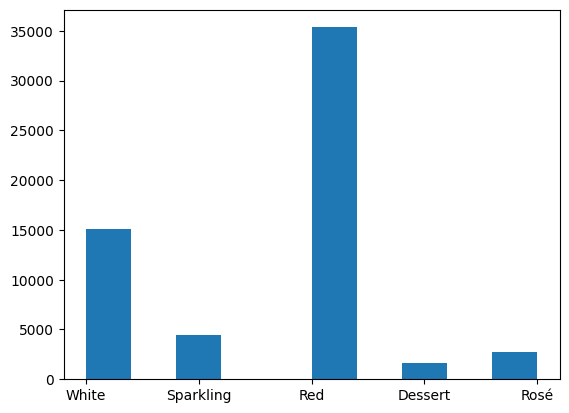

In [78]:
plt.hist(X_train_5['Type'])

In [61]:
# Define which columns need to be encoded
cat_cols = ['Type','Body','Acidity']
num_cols = ['ABV']
cat_pre = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
                        MinMaxScaler())
cat_num = make_pipeline(MinMaxScaler())

# Create preprocessor pipeline
preprocessing = make_column_transformer((cat_pre, cat_cols),(cat_num, num_cols))

# Create binary classifier
binary_classifier = SGDClassifier(random_state=42)

ova_classifier = OneVsRestClassifier(binary_classifier)

pipeline = make_pipeline(preprocessing, ova_classifier)

In [62]:
pipeline.fit(X_train_5, y_train_5)

y_pred_5 = ova_classifier.predict(preprocessing.transform(X_test_5))

# Evaluate performance
accuracy_5 = accuracy_score(y_test_5, y_pred_5)
print("Accuracy:", accuracy_5)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_5, y_pred_5))

Accuracy: 0.3378559596118956

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.22      0.36      1549
           1       0.96      0.04      0.07      5672
           2       0.65      0.49      0.56      3698
           3       0.00      0.00      0.00       737
           4       0.00      0.00      0.00      1557
           5       0.93      0.95      0.94     21422
           6       0.00      0.00      0.00      4932
           7       0.75      0.80      0.78     16304
           8       0.79      0.74      0.76      5065
           9       0.75      0.69      0.72      5711
          10       0.54      0.13      0.21      3495
          11       0.69      0.68      0.69      4726

   micro avg       0.81      0.63      0.71     74868
   macro avg       0.59      0.40      0.42     74868
weighted avg       0.73      0.63      0.64     74868
 samples avg       0.82      0.70      0.74     74868



/Users/tobiaseckers/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
y_test_5.columns

Index(['Appetizer and Snacks', 'Cheese', 'CuredMeat', 'Desserts', 'LeanFish',
       'Meat', 'Pasta', 'Poultry', 'RichFish', 'Shellfish', 'SpicyFood',
       'Vegetarian'],
      dtype='object')

# RandomOverSampling

In [100]:
X_train_5.shape, X_test_5.shape, y_train_5.shape, y_test_5.shape 

((59157, 4), (25354, 4), (59157, 12), (25354, 12))

(array([ 21777.,      0., 223406.,      0.,  81077.,      0.,  32786.,
             0.,   6232.,   4291.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

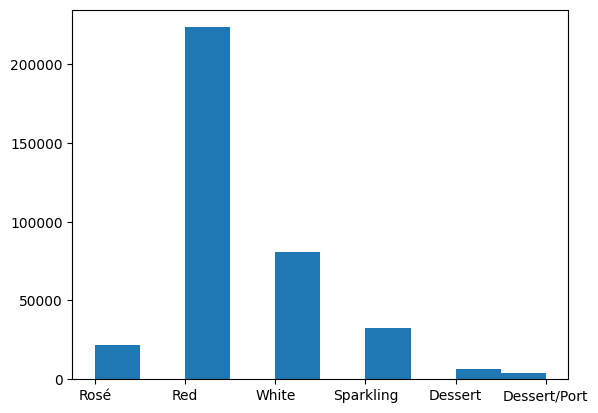

In [101]:
plt.hist(X_train['Type'])

In [97]:
# features to select: Type, Elaborate, Grapes, ABV, Body, Acidity
# target: harmonize
y = wine_df_1[['Harmonize']]
X = wine_df_1[['Type','ABV', 'Body','Acidity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ros = RandomOverSampler(random_state=42)

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [99]:
pipeline.fit(X_train_res, y_train_res)

y_pred_res = ova_classifier.predict(preprocessing.transform(X_test))

# Evaluate performance
accuracy_res = accuracy_score(y_test, y_pred_res)
print("Accuracy:", accuracy_res)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_res))

Accuracy: 0.13521311723815718

Classification Report:


/Users/tobiaseckers/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tobiaseckers/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 precision    recall  f1-score   support

      Appetizer       0.00      0.00      0.00      2061
           Beef       0.00      0.00      0.00     24579
     BlueCheese       0.03      0.69      0.06       485
      CuredMeat       0.00      0.00      0.00      4185
   FruitDessert       0.01      0.02      0.01       342
       GameMeat       0.00      0.00      0.00     15519
     GoatCheese       0.00      0.00      0.00       793
     HardCheese       0.07      0.08      0.07      3984
           Lamb       0.00      0.00      0.00     16685
       LeanFish       0.00      0.00      0.00      2186
MaturatedCheese       0.00      0.00      0.00      4018
      Mushrooms       0.03      0.61      0.05       438
          Pasta       0.00      0.00      0.00      7397
           Pork       0.19      0.03      0.04      9284
        Poultry       0.18      0.76      0.29     23768
       RichFish       0.00      0.00      0.00      6829
      Shellfish       0.00    

/Users/tobiaseckers/.pyenv/versions/3.10.6/envs/VinoDine/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# no grapes

In [205]:
save_file_name = "Cleaned_Full_100K_wines"
mlb_harm = MultiLabelBinarizer(sparse_output=False)
mlb_grape = MultiLabelBinarizer(sparse_output=False)

wine_df_6 = pd.read_csv(f'~/code/ArjanAngenent/VinoDine/raw_data/{save_file_name}.csv')

wine_df_6.drop(columns=['Grapes'], inplace=True)

# Binary encode Harmonize(kinds of food)
wine_df_6_bin = wine_df_6.join(pd.DataFrame(
    mlb_harm.fit_transform(eval(element) for element in wine_df_6.Harmonize),
    index=wine_df_6.index,
    columns=mlb_harm.classes_
    ))
wine_df_6_bin.drop(columns=['Harmonize'], inplace=True)
wine_df_6_bin



# Create a list of the kind of grapes that are mentioned less then 2.000 times
harm_list = wine_df_6_bin.iloc[:,15:].sum() # sum the number of times a food is mentioned via column
harm_to_drop = harm_list[harm_list<=15_000].index.to_list() # create a list withe kind of food mentioned less then 50 times
wine_df_6_bin.drop(columns=harm_to_drop, inplace=True) # drop columns with food not mentioned more then 50 times
wine_df_6_bin = wine_df_6_bin[wine_df_6_bin.iloc[:,15:].eq(1).any(axis=1)] # drop wines which are not represented by a food anymore

#Drop addional columns not used for model
wine_df_6_bin_cleaned = wine_df_6_bin.drop(columns=['WineName', 'WineID','Code','Country','RegionID','RegionName','WineryID','Website','Vintages', 'WineryName'])

wine_df_6_bin_cleaned

,Type,Elaborate,ABV,Body,Acidity,Beef,CuredMeat,GameMeat,Lamb,Pasta,Pork,Poultry,RichFish,Shellfish,Veal,Vegetarian
0,Sparkling,Varietal/100%,7.5,Medium-bodied,High,0,0,0,0,0,1,0,1,1,0,0
1,Red,Varietal/100%,12.0,Medium-bodied,Medium,1,0,0,0,1,0,0,0,0,0,0
2,Red,Varietal/100%,12.0,Full-bodied,High,1,0,0,1,0,0,1,0,0,0,0
4,Red,Assemblage/Bordeaux Red Blend,11.0,Full-bodied,Medium,1,0,1,1,0,0,1,0,0,0,0
5,Red,Varietal/100%,12.5,Full-bodied,High,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100640,Red,Varietal/100%,12.0,Medium-bodied,High,1,0,1,1,0,0,0,0,0,0,0
100641,White,Varietal/100%,13.0,Medium-bodied,Medium,0,0,0,0,0,0,0,1,1,0,0
100642,Dessert,Varietal/100%,13.5,Medium-bodied,High,1,0,1,0,0,0,0,0,0,0,0
100644,White,Varietal/100%,12.5,Medium-bodied,High,0,1,0,0,0,1,1,0,1,0,0


In [193]:
harm_list

Beef          57774
CuredMeat     16631
GameMeat      36436
Lamb          38725
Pasta         22486
Pork          25406
Poultry       58315
RichFish      18680
Shellfish     25005
SpicyFood     13509
Veal          24707
Vegetarian    18278
dtype: int64

In [194]:
harm_to_drop

['SpicyFood']

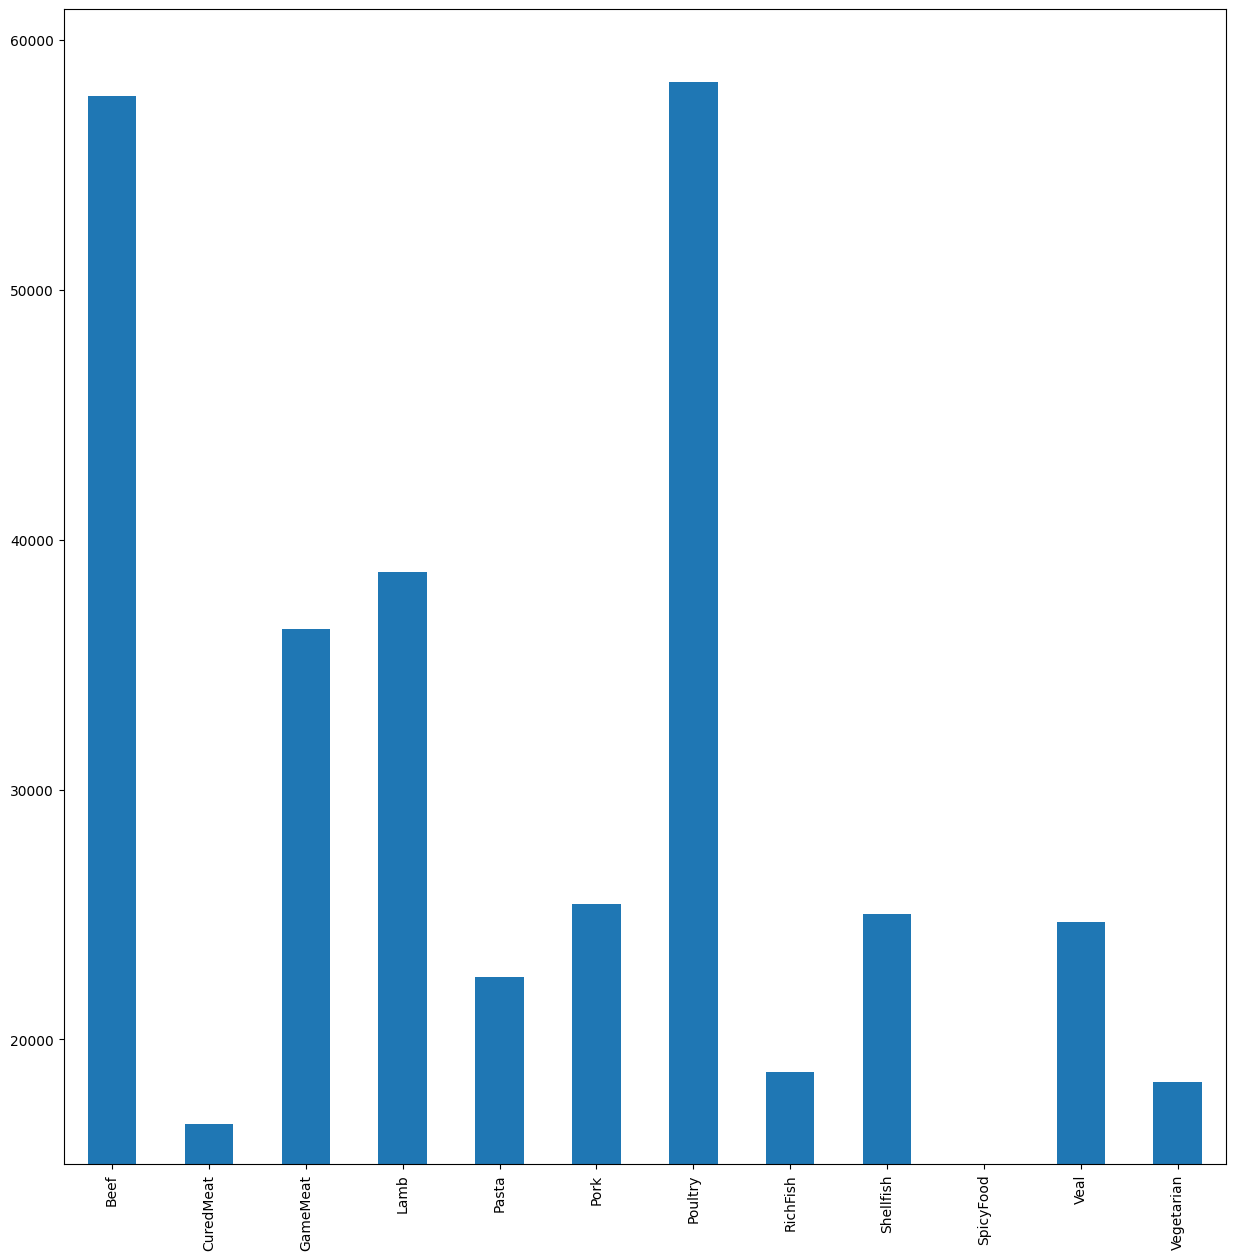

In [195]:
plt.figure(figsize=(15,15))
harm_list.plot(kind='bar')
plt.ylim(bottom=15_000);

In [196]:
# Define which columns need to be encoded
cat_cols = make_column_selector(dtype_include='object')
num_cols = make_column_selector(dtype_include='number')
cat_pre = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
                        MinMaxScaler())
cat_num = MinMaxScaler()

# Create preprocessor pipeline
preprocessing = make_column_transformer((cat_pre, cat_cols),(cat_num, num_cols))

# Create binary classifier
binary_classifier = SGDClassifier(max_iter=500, random_state=42)

ova_classifier = OneVsRestClassifier(binary_classifier)

pipeline = make_pipeline(preprocessing, ova_classifier)

In [197]:
X_6 = wine_df_6_bin_cleaned[['Type','Elaborate','Body','Acidity', 'ABV']]
y_6 = wine_df_6_bin_cleaned.drop(columns=['Type','Elaborate','Body','Acidity', 'ABV'])

In [198]:
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size=0.3, random_state=42)

In [199]:
pipeline.fit(X_train_6, y_train_6)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x4026616f0>),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x402717c10>)])),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=SGDClassifier(max_iter=500,
                                                             random_state=42)))])

In [200]:
y_pred_6 = ova_classifier.predict(preprocessing.transform(X_test_6))

In [201]:
# Evaluate performance
accuracy_6 = accuracy_score(y_test_6, y_pred_6)
print("Accuracy:", accuracy_6)

Accuracy: 0.24188502808705303


In [202]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test_6, y_pred_6))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     17390
           1       0.59      0.64      0.61      4952
           2       0.63      0.81      0.71     10912
           3       0.81      0.93      0.86     11641
           4       0.85      0.02      0.04      6743
           5       0.66      0.24      0.35      7656
           6       0.73      0.79      0.76     17504
           7       0.76      0.71      0.73      5575
           8       0.75      0.75      0.75      7469
           9       0.77      0.53      0.63      7469
          10       0.60      0.67      0.63      5491

   micro avg       0.75      0.71      0.73    102802
   macro avg       0.73      0.64      0.64    102802
weighted avg       0.76      0.71      0.69    102802
 samples avg       0.74      0.71      0.70    102802

